## **Project Name**  - Mental Health in Tech Survey

## **Project Type** - EDA

## **Project By:** Siddhi Wagh

## **Project Summary**

This project analyzes a mental health survey focused on workplace environments, with the goal of understanding how geographic location, remote work, and employer practices influence mental health awareness, treatment-seeking behavior, and perceived stigma. It measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

GitHub Link - https://github.com/Siddhi-Wagh/Mental-Health-Survey-Analysis

## **Problem Statement**

There is a need to analyze the survey data on mental health in tech workplace. This project seeks to address how mental health issues and attitudes toward mental health in the workplace vary by geographic location, and how do organizational factors such as remote work, coworkers and employer support etc. impact employee behavior and perception.

## ***1. Knowing the Data***

In [324]:
# import python libraries

In [325]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

## Dataset Loading 

In [326]:
# importing csv file

survey = pd.read_csv('survey.csv')

## Dataset Rows & Columns count

In [327]:
survey.shape

(1259, 27)

## Dataset First View 

In [328]:
survey.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


## Dataset Information

In [329]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Missing Values/Null Values

In [330]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [331]:
# Filling null values with alternate text.

survey['state'] = survey['state'].fillna('Unknown')
survey['self_employed'] = survey['self_employed'].fillna('Dont know')
survey['work_interfere'] = survey['work_interfere'].fillna('Cant say')

In [332]:
survey.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,Dont know,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,Dont know,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,Dont know,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,Dont know,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,Dont know,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,Dont know,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,Dont know,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,Unknown,Dont know,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,Dont know,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,Unknown,Dont know,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [333]:
survey.tail(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1249,2015-07-22 18:57:54,30,M,United States,CA,No,Yes,Yes,Sometimes,26-100,...,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Bipolar disorder
1250,2015-07-27 23:25:34,30,Male,United States,CA,Yes,Yes,Yes,Often,26-100,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
1251,2015-08-17 09:38:35,36,Male,South Africa,Unknown,No,Yes,Yes,Often,100-500,...,Somewhat easy,No,No,Some of them,Yes,No,Yes,Yes,No,NaN
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-12 11:17:21,26,male,United Kingdom,Unknown,No,No,Yes,Cant say,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Cant say,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


## ***2. Understanding data Variables***

# Dataset Describe

In [334]:
survey.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


***Here we can see we need to clean and transform 'Age' column.***

...

# Dataset Columns

In [335]:
# Checking all the column names

survey.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

## 3. ***Data Wrangling***

From the above queries I would have to make changes in different columns. Age column shows many outliers with few negative numbers and few more than 100 years of age. I will delete those rows. I have considered the age range of 20 - 100 in the dataset.

Also in Gender column, there are multiple options selected which I will have to standardize.

In [336]:
# Limiting Age column values 

survey = survey[(survey['Age'] >= 20) & (survey['Age'] <= 100)]

In [337]:
# Standardizing Gender Column

def clean_gender(Gender):
    Gender = str(Gender).strip().lower()
    if Gender in ['male','mail','maile','make','mal','malr', 'm', 'man', 'cis male','cid man', 'male-ish', 'msle']:
        return 'Male'
    elif Gender in ['female', 'f', 'woman','femail' 'cis female', 'femake', 'female (cis)']:
        return 'Female'
    else:
        return 'Other'

survey['Gender'] = survey['Gender'].apply(clean_gender)

In [338]:
# Defining valid employee range values

valid_ranges = [ '26-100', '100-500', '500-1000', 'More than 1000' ]

def clean_employees(value):
    
    if value in valid_ranges:
        return value
    else:
        return 'Dont know'

survey['no_employees'] = survey['no_employees'].apply(clean_employees)

....

***Let's see if all the transformations are applied or not by checking first few rows of the dataset.***

....

In [339]:
survey.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,Dont know,No,Yes,Often,Dont know,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,Dont know,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,Dont know,No,No,Rarely,Dont know,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,Dont know,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,Dont know,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,Dont know,Yes,No,Sometimes,Dont know,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,Dont know,Yes,Yes,Sometimes,Dont know,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,Male,Canada,Unknown,Dont know,No,No,Never,Dont know,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,Dont know,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,Unknown,Dont know,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


....

**Now the data is clean and Transformed. Lets start with visualization.**

....

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [340]:
sns.set_palette('Set2')

#### Chart - 1

Text(0.5, 1.0, 'Gender Distribution of Respondents')

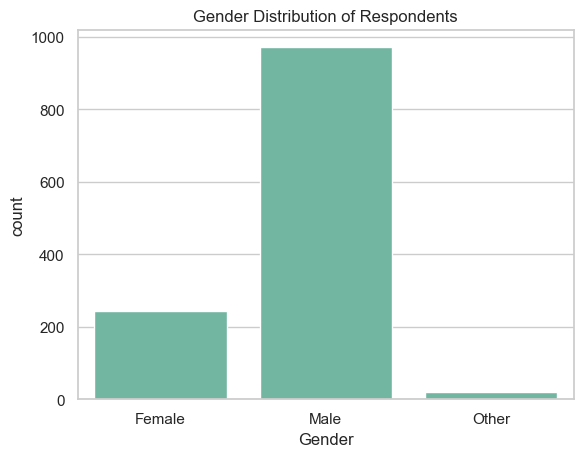

In [341]:
# Chart - 1 visualization code

sns.countplot(data=survey, x='Gender')
plt.title('Gender Distribution of Respondents')

##### 1. Why did you pick the specific chart?

It is more convenient to understand respondent demographics and gender balance in count plot format.

##### 2. What is/are the insight(s) found from the chart?

From the above gragh we can see that there are more Male respondents in the survey data followed by females.

##### 3. Will the gained insights help creating a positive business impact?

Yes. this will help understanding which genders are more represented in the survey.

#### Chart - 2

Text(0.5, 1.0, 'Age Distribution of Respondents')

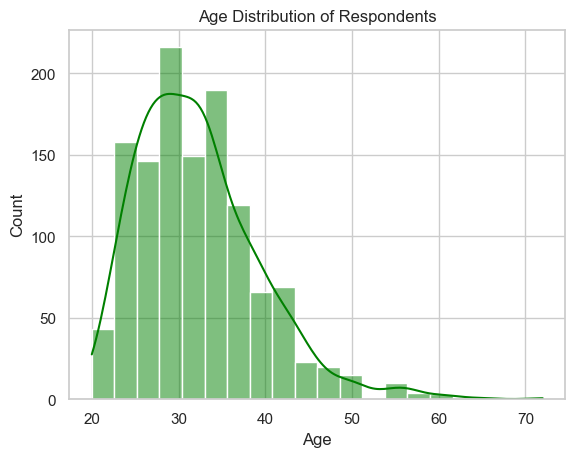

In [342]:
# Chart - 2 visualization code

sns.histplot(survey['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Respondents')

##### 1. Why did you pick the specific chart?
   
It is more convenient to explore the age range and concentration of respondents using the histogram.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals that the age groups between 25 to 35 are most represented.

##### 3. Will the gained insights help creating a positive business impact?

Yes.

#### Chart - 3

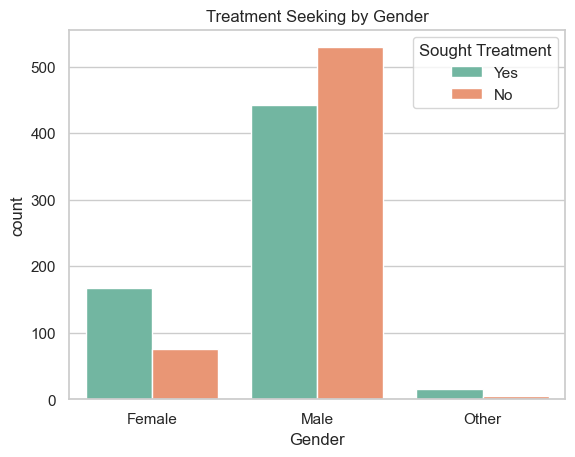

In [343]:
# Chart - 3 visualization code

sns.countplot(data=survey, x='Gender', hue='treatment')
plt.title('Treatment Seeking by Gender')
plt.legend(title='Sought Treatment')

##### 1. Why did you pick the specific chart?

A count plot will help in understanding how treatment seeking differs by gender.

##### 2. What is/are the insight(s) found from the chart?

It is observed that more female respondents have sought treatment for mental health illness as compared to males. It is also observed that other gender respondents are also seeking treatment.

##### 3. Will the gained insights help creating a positive business impact?

Yes, by identifying gender differences in seeking mental health treatment.

#### Chart - 4

Text(0.5, 1.0, 'Treatment Seeking vs Family History (Counts)')

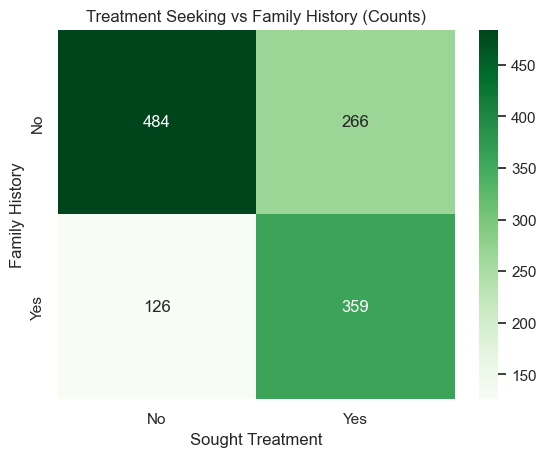

In [344]:
# Chart - 4 visualization code

heatmap_data = pd.crosstab(survey['family_history'], survey['treatment'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Sought Treatment')
plt.ylabel('Family History')
plt.title('Treatment Seeking vs Family History (Counts)')

##### 1. Why did you pick the specific chart?

Used heatmap to analyze relationships between two categorical variables: Family history and Treatment.

##### 2. What is/are the insight(s) found from the chart?

Chart shows that those respondents who have family history of mental health illness are higher in number to seek treatment.This indicates that those with family history may be more aware and proactive.

While on other hand those with no family history are very less in number to seek treatment.

##### 3. Will the gained insights help creating a positive business impact?

Yes.  family history influences seeking treatment.

#### Chart - 5

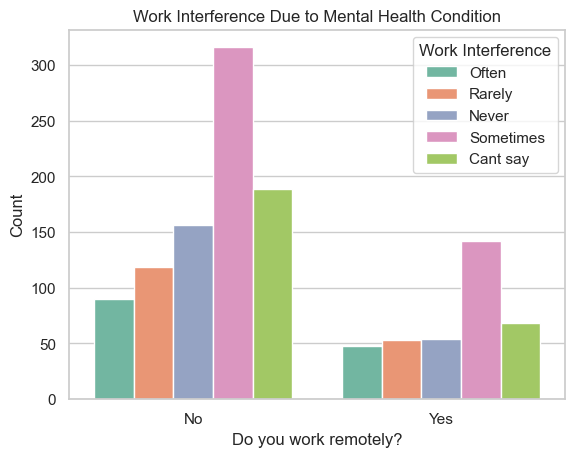

In [345]:
# Chart - 5 visualization code

sns.countplot(data=survey, x='remote_work', hue='work_interfere')
plt.title('Work Interference Due to Mental Health Condition')
plt.xlabel('Do you work remotely?')
plt.ylabel('Count')
plt.legend(title='Work Interference')

##### 1. Why did you pick the specific chart?

Column chart helps determine the how one variable varies with different categories.

##### 2. What is/are the insight(s) found from the chart?

It can be seen from the chart that respondents who work from office are more prone to mental health issues compared to those who work remotely. A large number of the respondents feel that mental health interferes with their work sometimes.

#### Chart - 6

Text(0.5, 1.0, 'Tech company ?')

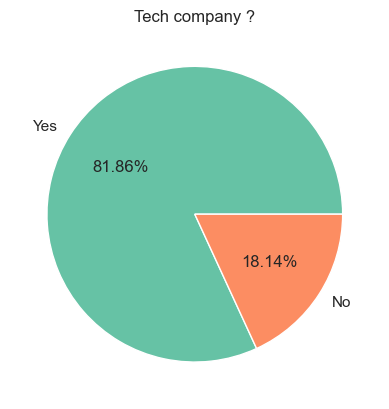

In [346]:
# Chart - 6 visualization code

counts = survey['tech_company'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.2f%%')
plt.title('Tech company ?')

##### 1. Why did you pick the specific chart?

Pie chart shows the distribution of categories in percentage out of total population.

##### 2. What is/are the insight(s) found from the chart?

Chart shows that 81.86% of respondents are from tech companies whereas 18.14% from non-tech.

##### 3. Will the gained insights help creating a positive business impact?

No.

#### Chart - 7

Text(47.24999999999999, 0.5, 'Company provides mental health benefits ?')

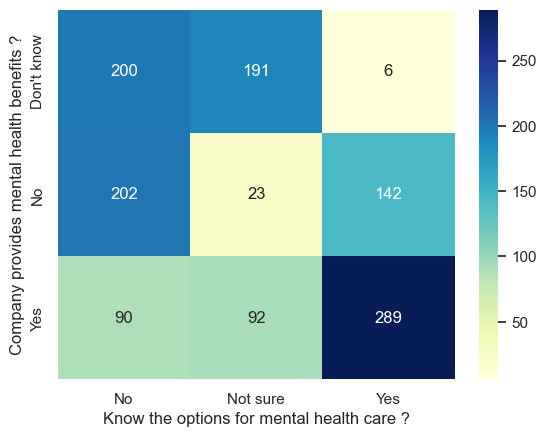

In [347]:
# Chart - 7 visualization code

heatmap_data = survey.groupby(['benefits', 'care_options'])['tech_company'].count().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Know the options for mental health care ?')
plt.ylabel('Company provides mental health benefits ?')

##### 1. Why did you pick the specific chart?

Heatmap shows distribution of values in two categories with colour coding with darkest having higher count.

##### 2. What is/are the insight(s) found from the chart?

Chart shows that most of the companies provide mental health benefits and respondents know the options for mental health care.

#### Chart - 8

Text(0, 0.5, 'Country')

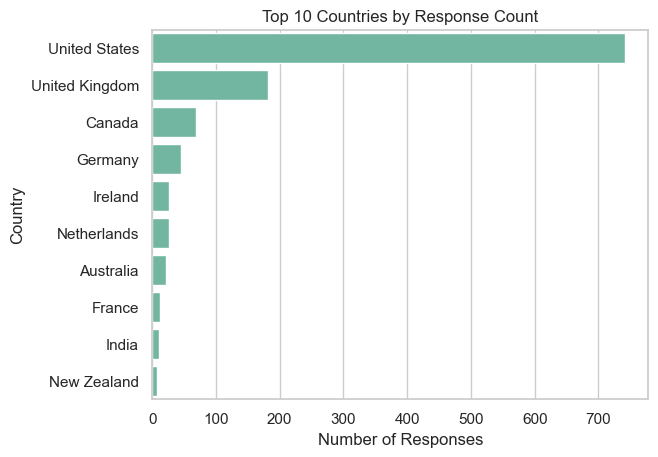

In [348]:
# Chart - 8 visualization code

top_countries = survey['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Response Count")
plt.xlabel("Number of Responses")
plt.ylabel("Country")

##### 1. Why did you pick the specific chart?

Bar chart helps in understanding the category wise distribution.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the chart that highest number of respondents are from  United States followed by United Kingdom and then Canada.

##### 3. Will the gained insights help creating a positive business impact?

No.

#### Chart - 9

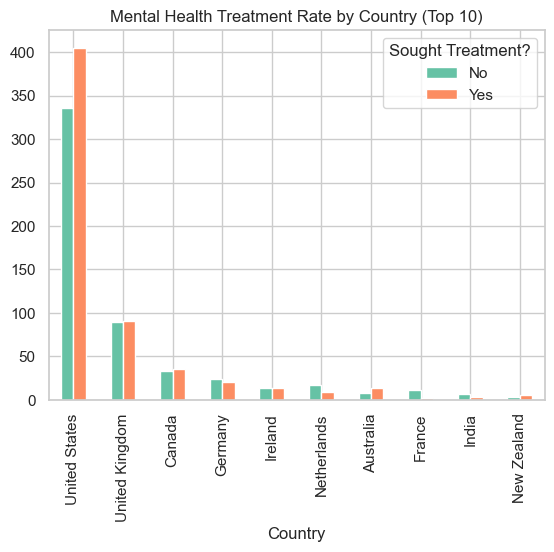

In [349]:
# Chart - 9 visualization code

treatment_by_country = survey.groupby('Country')['treatment'].value_counts().unstack()
treatment_by_country = treatment_by_country.loc[treatment_by_country.sum(axis=1).sort_values(ascending=False).index[:10]]

treatment_by_country.plot(kind='bar', stacked=False)
plt.title('Mental Health Treatment Rate by Country (Top 10)')
plt.legend(title='Sought Treatment?')

##### 1. Why did you pick the specific chart?
 
Bar chart helps in comparing the category wise distribution.

##### 2. What is/are the insight(s) found from the chart?

This chart shows that out of all the respondents from United States, higher number of respondents with mental health illness have sought the treatment.In United Kingdom half of respondents have taken the treatment whereas half have not.

#### Chart - 10

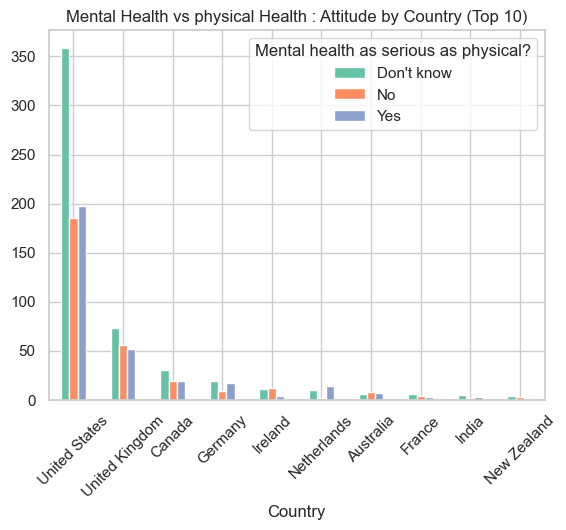

In [350]:
# Chart - 10 visualization code

attitude = 'mental_vs_physical'

attitude_by_country = survey.groupby('Country')[attitude].value_counts().unstack()
attitude_by_country = attitude_by_country.loc[attitude_by_country.sum(axis=1).sort_values(ascending=False).index[:10]]

attitude_by_country.plot(kind='bar')
plt.title(f'Mental Health vs physical Health : Attitude by Country (Top 10)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Mental health as serious as physical?')

##### 1. Why did you pick the specific chart?

Bar chart helps in comparing the category wise distribution.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the chart that vey few respondents think that their employer takes mental health as seriously as physical health.

#### Chart - 11

Text(0.5, 1.0, 'Negative consequences of discussing physical health issues')

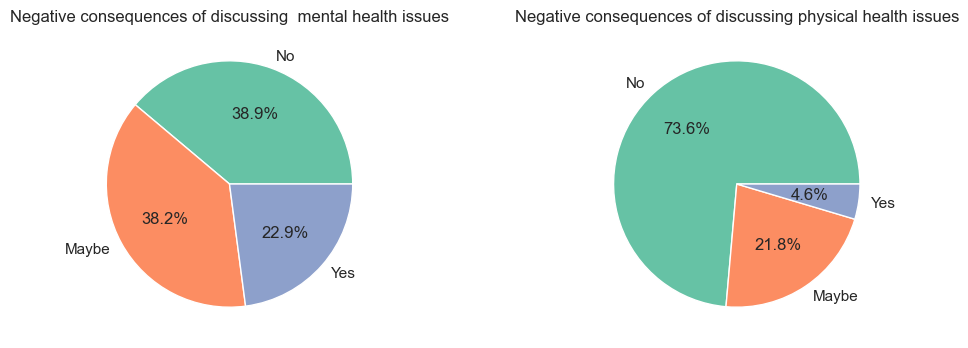

In [351]:
# Chart - 11 visualization code

data1 = survey['mental_health_consequence'].value_counts()
data2 = survey['phys_health_consequence'].value_counts()

# Creating side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First pie chart
axes[0].pie(data1, labels=data1.index, autopct='%1.1f%%')
axes[0].set_title('Negative consequences of discussing  mental health issues')

# Second pie chart
axes[1].pie(data2, labels=data2.index, autopct='%1.1f%%')
axes[1].set_title('Negative consequences of discussing physical health issues')

##### 1. Why did you pick the specific chart?

I have used pie chart to show the proportions of respondents who agree and disagree to a particular question.

##### 2. What is/are the insight(s) found from the chart?

From the abpove pie charts it is clear that 38.2% respondents said maybe and 22.9 % said that they feel that there are Negative consequences of discussing mental health issues. Also 73.6% respodents said that there is no Negative consequence of discussing physical health issues.

This shows that discussing mental health issues is more difficult than physical health.

#### Chart - 12

Text(0, 0.5, 'Count')

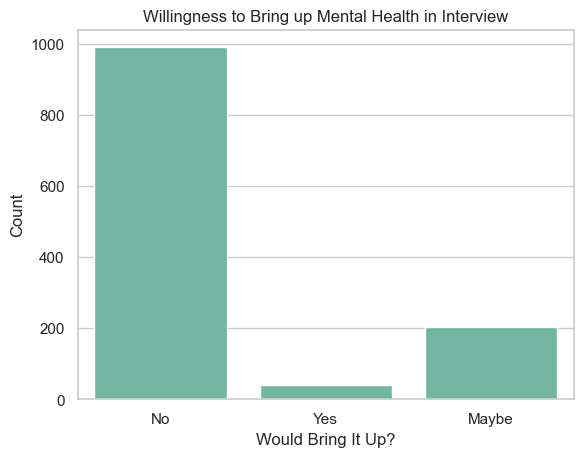

In [352]:
# Chart - 12 visualization code

sns.countplot(data=survey, x='mental_health_interview')
plt.title('Willingness to Bring up Mental Health in Interview')
plt.xlabel('Would Bring It Up?')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar chart helps in comparing the category wise distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

Highest number of respondents dont want to bring up a mental health issue with a potential employer in an interview.

#### Chart - 13

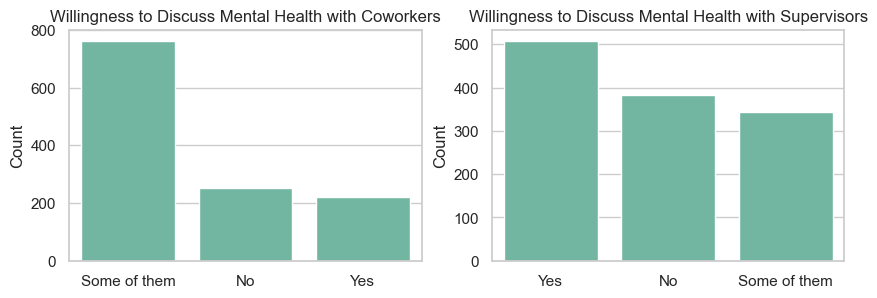

In [353]:
# Chart - 13 visualization code

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.countplot(data=survey, x='coworkers', ax=axes[0])
axes[0].set_title('Willingness to Discuss Mental Health with Coworkers')

sns.countplot(data=survey, x='supervisor', ax=axes[1])
axes[1].set_title('Willingness to Discuss Mental Health with Supervisors')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('Count')

##### 1. Why did you pick the specific chart?

I have used count plot to visualize the frequency of observations in each category.

##### 2. What is/are the insight(s) found from the chart?

It is clear from the chart that a large number of respondents are ready to discuss Mental Health with Supervisors, whereas relatively very less are ready to discuss with their coworkers.

## ***5. Key Findings***

1. **Age Group:** Most respondents are aged 25–35.

2. **Gender:** More male respondents, but females and other genders seek treatment more.

3. **Family History:** Those with a family history of mental illness are more likely to seek treatment.

4. **Work Environment:** Office workers report more mental health issues than remote workers.

5. **Work Impact:** Many say mental health sometimes affects their work.

6. **Industry Split:** 82% from tech, 18% from non-tech companies.

7. **Benefits Awareness:** Most know about mental health benefits at work.

8. **Top Countries:** Most respondents from USA, followed by UK and Canada.

9. **Treatment by Country:** More people seek treatment in the USA. UK is evenly split.

10. **Employer Support:** Few believe employers treat mental health as seriously as physical health.

11. **Job Interviews:** Most are unwilling to discuss mental health in interviews.

12. **Willingness to Talk:** More comfortable discussing mental health with supervisors than coworkers.

## ***6. Recommendations for Organizations***

From the above insights I would suggest:


1. **Increase mental health education and awareness, especially for employees without prior exposure.**

2. **Encourage remote or hybrid work models, where feasible, to reduce mental health strain.**

3. **Promote parity between mental and physical health support, both in policy and practice.**

4. **Create safe spaces and channels for mental health discussions, including training for supervisors.**

5. **Address stigma by actively communicating the lack of negative consequences and normalizing mental health conversations in all organizational levels.**

## ***Conclusion:***

This analysis provides a valuable insights into how mental health issues and attitudes toward them vary across demographics, workplace environments, and geographic locations. The data shows that while many individuals report experiencing mental health challenges, a substantial portion face barriers such as stigma, lack of resources, and fear of negative consequences when seeking help.This highlights the urgent need for better mental health support and awareness in workplaces globally. Data-driven insights like these can empower employers, HR professionals, and policymakers to design healthier, more supportive work environments for everyone.